## Objective: use a dummy classifier to benchmark the baseline

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 4

### Load train and test data

In [21]:
train_data = pd.read_csv('./data/train_data.csv', parse_dates=['date_act', 'date_ppl'])
test_data = pd.read_csv('./data/test_data.csv', parse_dates=['date_act', 'date_ppl'])
print train_data.shape, test_data.shape

(2153346, 55) (498687, 54)


In [22]:
test_data.dtypes

people_id                    object
activity_id                  object
date_act             datetime64[ns]
activity_category             int64
char_1_act                    int64
char_2_act                    int64
char_3_act                    int64
char_4_act                    int64
char_5_act                    int64
char_6_act                    int64
char_7_act                    int64
char_8_act                    int64
char_9_act                    int64
char_10_act                   int64
char_1_ppl                    int64
group_1                       int64
char_2_ppl                    int64
date_ppl             datetime64[ns]
char_3_ppl                    int64
char_4_ppl                    int64
char_5_ppl                    int64
char_6_ppl                    int64
char_7_ppl                    int64
char_8_ppl                    int64
char_9_ppl                    int64
char_10_ppl                    bool
char_11                        bool
char_12                     

In [23]:
test_data.head()

,people_id,activity_id,date_act,activity_category,char_1_act,char_2_act,char_3_act,char_4_act,char_5_act,char_6_act,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100004,act1_249281,2022-07-20,1,5,10,5,1,6,1,...,True,True,True,True,True,True,True,True,True,76
1,ppl_100004,act2_230855,2022-07-20,5,0,0,0,0,0,0,...,True,True,True,True,True,True,True,True,True,76
2,ppl_10001,act1_240724,2022-10-14,1,12,1,5,4,6,1,...,False,True,True,True,True,True,True,True,True,90
3,ppl_10001,act1_83552,2022-11-27,1,20,10,5,4,6,1,...,False,True,True,True,True,True,True,True,True,90
4,ppl_10001,act2_1043301,2022-10-15,5,0,0,0,0,0,0,...,False,True,True,True,True,True,True,True,True,90


In [24]:
pd.isnull(test_data).sum()

people_id            0
activity_id          0
date_act             0
activity_category    0
char_1_act           0
char_2_act           0
char_3_act           0
char_4_act           0
char_5_act           0
char_6_act           0
char_7_act           0
char_8_act           0
char_9_act           0
char_10_act          0
char_1_ppl           0
group_1              0
char_2_ppl           0
date_ppl             0
char_3_ppl           0
char_4_ppl           0
char_5_ppl           0
char_6_ppl           0
char_7_ppl           0
char_8_ppl           0
char_9_ppl           0
char_10_ppl          0
char_11              0
char_12              0
char_13              0
char_14              0
char_15              0
char_16              0
char_17              0
char_18              0
char_19              0
char_20              0
char_21              0
char_22              0
char_23              0
char_24              0
char_25              0
char_26              0
char_27              0
char_28    

### Check the activity date in train and test data before splitting the dataset

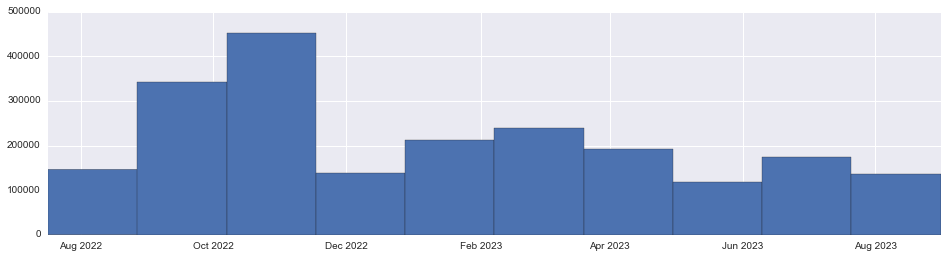

In [9]:
train_data.date_act.hist()

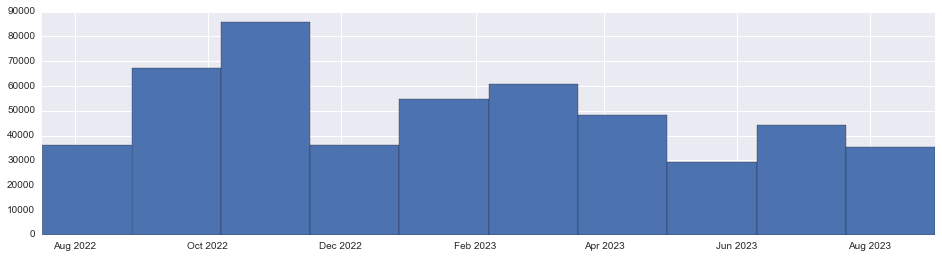

In [25]:
test_data.date_act.hist()

### Check the people date in train and test data before splitting the dataset

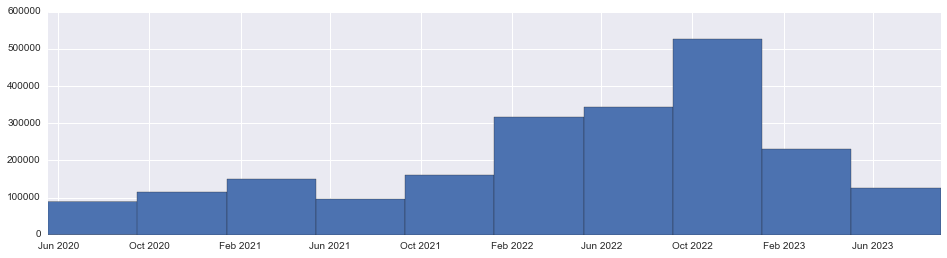

In [26]:
train_data.date_ppl.hist()

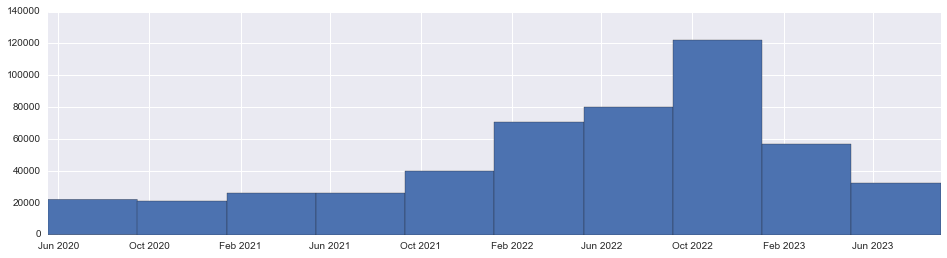

In [27]:
test_data.date_ppl.hist()

- The time series are similar for train and test data, so we don't need worry about time split of train data

### split the train data into train and validation sets

In [16]:
from sklearn.cross_validation import KFold
from sklearn.dummy import DummyClassifier
# from sklearn.metrics import roc_auc_score, roc_curve, auc

In [17]:
kf = KFold(n=train_data.shape[0], n_folds=5, shuffle=True, random_state=1234)

In [18]:
clf = DummyClassifier(strategy='most_frequent',random_state=1234)
for train_index, vali_index in kf:
    X_train, X_vali = train_data[['activity_category', 'char_38']].loc[train_index], train_data[['activity_category', 'char_38']].loc[vali_index]
#     print X_train.shape, X_vali.shape
    y_train, y_vali = train_data.outcome[train_index], train_data.outcome[vali_index]
#     print y_train.shape, y_vali.shape
    clf.fit(X_train, y_train)
    print 'The mean accuracy: {:.3f}'.format(clf.score(X_vali, y_vali))

The mean accuracy: 0.554
The mean accuracy: 0.556
The mean accuracy: 0.557
The mean accuracy: 0.556
The mean accuracy: 0.557


- The mean accuracy is around 0.56, it makes sense because 0 outcome accounts a little more for the total outcomes.

### In the following stage, we going to train a decison tree and a random forest to improve the performance